In [3]:
import pyleoclim as pyleo
import numpy as np

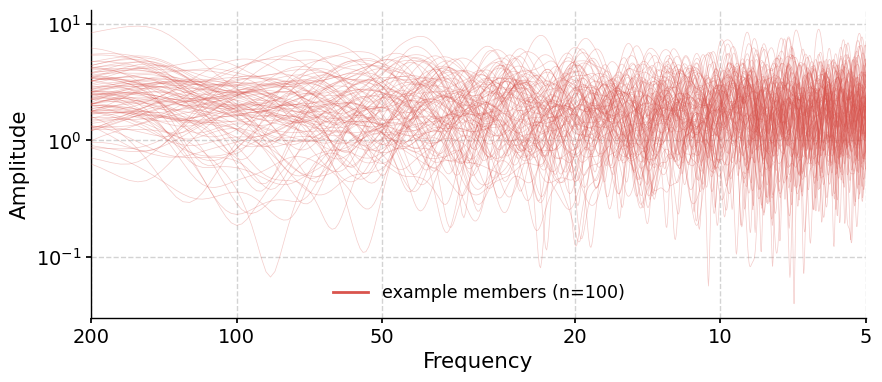

In [7]:
nn = 300 # number of noise realizations
nt = 500 # timeseries length
psds = []

time, signal = pyleo.utils.gen_ts(model='colored_noise',nt=nt,alpha=1.0)

ts = pyleo.Series(time=time, value = signal, verbose=False).standardize()
noise = np.random.randn(nt,nn)

for idx in range(nn):  # noise
    ts = pyleo.Series(time=time, value=signal+10*noise[:,idx], verbose=False)
    psd = ts.spectral()
    psds.append(psd)

mPSD = pyleo.MultiplePSD(psds)

fig, ax = mPSD.plot_traces(num_traces=100)